In [2]:
import random
import itertools
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np


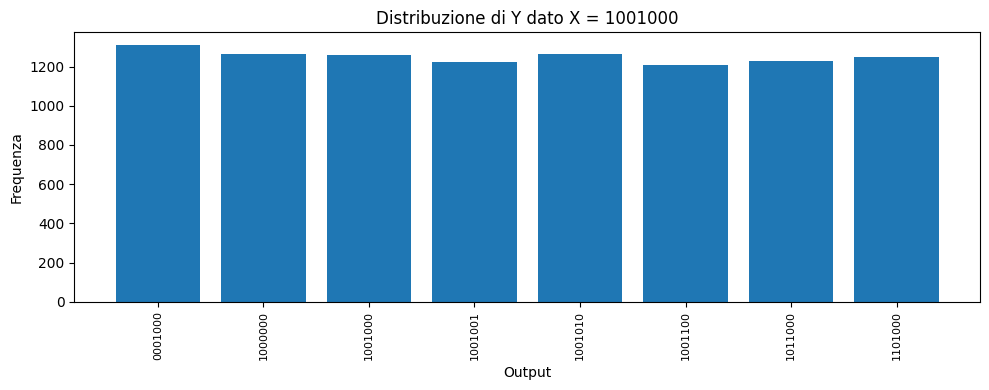

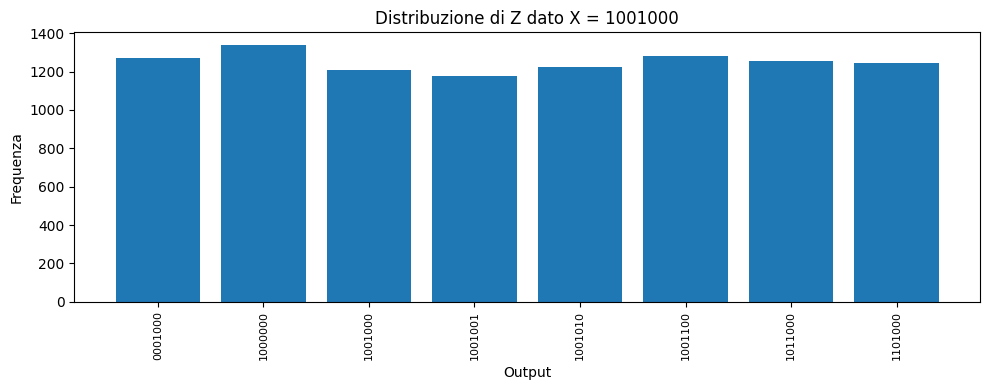

In [ ]:


def generate_error_set(x, max_errors=1):
    """
    Genera tutti i vettori binari a distanza di Hamming ≤ max_errors da x.
    """
    n = len(x)
    neighbors = set()
    x_int = int(x, 2)

    # Nessun errore
    neighbors.add(x_int)

    for num_errors in range(1, max_errors + 1):
        for bit_positions in itertools.combinations(range(n), num_errors):
            error_mask = sum(1 << pos for pos in bit_positions)
            neighbors.add(x_int ^ error_mask)

    return [format(v, f"0{n}b") for v in neighbors]

def wiretap_channel(x):
    """
    Simula il canale wiretap:
    - y: output del legittimo ricevitore (max 1 errore)
    """
    Ty = generate_error_set(x)
    Tz = generate_error_set(x)
    y = random.choice(Ty)
    z = random.choice(Tz)
    return y, z

def run_experiment(x, num_samples=10000):
    y_samples = []
    z_samples = []

    for _ in range(num_samples):
        y, z = wiretap_channel(x)
        y_samples.append(y)
        z_samples.append(z)

    return y_samples, z_samples

def plot_distribution(samples, title):
    counter = Counter(samples)
    labels, counts = zip(*sorted(counter.items()))
    plt.figure(figsize=(10, 4))
    plt.bar(labels, counts)
    plt.xticks(rotation=90, fontsize=8)
    plt.title(title)
    plt.xlabel("Output")
    plt.ylabel("Frequenza")
    plt.tight_layout()
    plt.show()


x_input = "1001000"
y_samples, z_samples = run_experiment(x_input, 10000)
plot_distribution(y_samples, "Distribuzione di Y dato X = 1001000")
plot_distribution(z_samples, "Distribuzione di Z dato X = 1001000")

In [8]:

# Matrice H (3x7) per il codice Hamming (7,4)
H = np.array([
    [1, 0, 0, 0, 1, 1, 1],
    [0, 1, 0, 1, 0, 1, 1],
    [0, 0, 1, 1, 1, 0, 1]
], dtype=int)

input = np.array([1,0,0,1,0,0,0])

def syndrome(x):
    x.transpose
    s = H @ x
    return s

print(syndrome(input))


[1 1 1]


In [21]:
def Recovery(mess, syn):
    synTrasmessa = syndrome(mess)
    if (np.array_equal(synTrasmessa, syn)):
        return mess
    else:
        diffSyndrome = (synTrasmessa + syn) % 2
        for i in range(H.shape[1]):
            if np.array_equal(H[:, i], diffSyndrome):
                correctMess = mess.copy()
                correctMess[i] ^= 1  # flip bit
                return correctMess
    return "Error during recovering"

input = np.array([1,0,0,1,0,0,1])
inString = "1001001"
y, z = wiretap_channel(inString)
print("Forward Reconstruct: ", Recovery(input, syndrome(input)))
print("Reverse Recovery: ", Recovery(np.fromstring(y, sep=',', dtype=int), syndrome(y)))

Forward Reconstruct:  [1 0 0 1 0 0 1]


AttributeError: 'str' object has no attribute 'transpose'